## 1. Importing the Required Python Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

C:\Users\suyog\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## 2. Importing the required Datasets

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

### 2.1 Testing the imported data working properly or not

In [3]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

### 2.2 Checking the number of rows and columns are matching the data source or not

In [4]:
df.shape

(271116, 15)

In [5]:
region_df.shape

(230, 3)

## 3. Cleaning the data

### 3.1 Filtering the data only for "Summer"

In [6]:
df = df[df['Season'] == 'Summer']

### 3.2 Now we can see that this data table does not contain region column. So, we need to merge the "region_df" column to the "df" column using left join.

In [7]:
df = df.merge(region_df, on = 'NOC', how = 'left')

In [8]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [9]:
df['region'].unique()   #no. of countries participated in Olympic

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [10]:
df['region'].unique().shape

(206,)

### 3.3 Checking any duplicate values is present or not in the "df" table

In [11]:
df.duplicated().sum() 

1385

### 3.4 Removing all the duplicates from the dataset

In [12]:
df.drop_duplicates(inplace=True)

### 3.5 Now checking the previous operation

In [13]:
df.duplicated().sum()

0

### 3.6 Splitting the "Medal" col into 3 cols - Gold, Bronze, Silver for better analysis

In [14]:
pd.get_dummies(df['Medal'], dtype = int)

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

### 3.7 Now adding this table to the "df" table

In [15]:
df = pd.concat([df, pd.get_dummies(df['Medal'], dtype = int)], axis = 1)

In [16]:
df.shape

(221167, 20)

### 3.8 Problem Detected with the Dataset:

In [17]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

### 3.9 Problem Explanation via example: 

Like, in Hockey there are 11 players and this is a team event it is counting 11 gold per head which is wrong. To solve this problem, we need to remove duplicate on the basis of Team, NOC, Games, Year, City altogether where all the values are same then we drop that column.

In [18]:

df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

### 3.10 Fixing the problem

In [19]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year','City','Sport','Event','Medal'])
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
medal_tally

NOC  Gold  Silver  Bronze  total
0    USA  1035     802     708   2545
1    URS   394     317     294   1005
2    GBR   278     317     300    895
3    GER   235     261     283    779
4    FRA   234     256     287    777
..   ...   ...     ...     ...    ...
225  AHO     0       1       0      1
226  LBR     0       0       0      0
227  LCA     0       0       0      0
228  LES     0       0       0      0
229  LBA     0       0       0      0

[230 rows x 5 columns]

### 3.11 After cleaning the data the no. of rows and cols will be:

In [20]:
df.shape

(221167, 20)

## 4. Exploratory Data Analysis

### 4.1 How many unique Regions are there in the dataset?

In [21]:
df['region'].unique().shape

(206,)

### 4.2 In each category, how many medals did the winners win?

In [22]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

### 4.3 In which years were the Olympic Games organized?

In [23]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

### 4.4 Which countries participated in the Olympic games to date?

In [24]:
country = np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

### 4.5 What is the overall medal tally by region?

In [25]:
def fetch_medal_tally(year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == year]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

fetch_medal_tally(year='Overall', country='Overall')

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

### 4.6 What is the medal tally of India?

In [26]:
fetch_medal_tally(year=2016, country='India')

region  Gold  Silver  Bronze  total
0  India     0       1       1      2

### 4.7 How many editions Olympic games had been organized to date?

In [27]:
df['Year'].unique().shape[0] - 1
# -1 to not to count 1906 game because it is not being counted as an Olympic Game

28

### 4.8 In which cities the Olympic games had been organized?

In [28]:
df['City'].unique().shape[0]

23

In [29]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

### 4.9 How many sports are being played in the Olympics?

In [30]:
df['Sport'].unique().shape[0]

52

In [31]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### 4.10 How many events had been organized in the Olympics?

In [32]:
df['Event'].unique().shape[0]

651

### 4.11 How many athletes participated in the Olympics?

In [33]:
df['Name'].unique().shape[0]

116122

### 4.12 How many countries participate in the Olympics?

In [34]:
df['region'].unique().shape[0]

206

### 4.13 Over the years how many participating nations are attented Olympics?

In [35]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')
nations_over_time.rename(columns={'Year':'Edition', 'count':'No of Countries'}, inplace=True)
nations_over_time

index  Edition
28   1896       12
27   1904       14
26   1906       20
25   1908       22
24   1912       29
23   1920       29
22   1900       31
21   1924       45
20   1928       46
19   1932       47
18   1936       49
17   1948       59
16   1952       67
15   1956       71
14   1980       80
13   1960       83
12   1976       91
11   1964       93
10   1968      111
9    1972      120
8    1984      139
7    1988      156
6    1992      168
5    1996      196
4    2000      199
3    2004      200
2    2008      202
1    2012      203
0    2016      204

### 4.14 Who are the most successful athletes of all time? (Overall)

In [36]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15)
    x.rename(columns={'index': 'Name', 'Name': 'Medals'}, inplace=True)
    x = x.merge(df[['Name', 'Sport', 'region']], left_on='Name', right_on='Name', how='left').drop_duplicates('Name')
    
    return x

most_successful(df, 'Overall')

Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                          Aleksey Yuryevich Nemov      12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
195                           Birgit Fischer-Schmidt      12    Canoeing   
208                               Ryan Steven Lochte      12    Swimming   
222                             Paavo Johannes Nurmi      12   Athletics   
234                                       Sawao Kato      12  Gymnastics   
258                    Natalie Anne Coughlin (-Hall)      12    Swimming   
270                   Matthew Nicholas "Matt" Biondi      11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany  
208      USA  
222  Finland  
234    Japan  
258      USA  
270      USA

### 4.15 Who are the most successful athletes of all time (Country-wise)?

In [37]:
def most_successful_countrywise(df, country):
    temp_df = df.dropna(subset=['Medal'])
    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(15)
    x.rename(columns={'index': 'Name', 'Name': 'Medals'}, inplace=True)
    x = x.merge(df[['Name', 'Sport']], left_on='Name', right_on='Name', how='left').drop_duplicates('Name')

    return x

most_successful_countrywise(df, 'India')

Name  Medals      Sport
0           Udham Singh Kular       4     Hockey
4      Leslie Walter Claudius       4     Hockey
8       Shankar Pillay Laxman       3     Hockey
11        Ranganathan Francis       3     Hockey
14        Richard James Allen       3     Hockey
17               Balbir Singh       3     Hockey
20     Harbinder Singh Chimni       3     Hockey
23  Balbir Singh Dosanjh, Sr.       3     Hockey
26  Victor John "V. J." Peter       3     Hockey
29           Dhyan Chand Bais       3     Hockey
32            Prithipal Singh       3     Hockey
35       Randhir Singh Gentle       3     Hockey
38            Roop Singh Bais       2     Hockey
40           Hari Pal Kaushik       2     Hockey
42       Sushil Kumar Solanki       2  Wrestling

## 5. Data Visualization

### 5.1 Year-wise no. of Countries participated in the Olympics (No. of Countries vs Edition)

In [38]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')

In [39]:
nations_over_time.rename(columns={'index':'Edition', 'Year':'No of Countries'}, inplace=True)

In [40]:
import plotly.express as px

In [41]:
fig = px.line(nations_over_time, x="Edition", y="No of Countries") # Create the line plot
fig.show()

### 5.2 Year-wise played Sports Heatmap

<Axes: xlabel='Year', ylabel='Sport'>

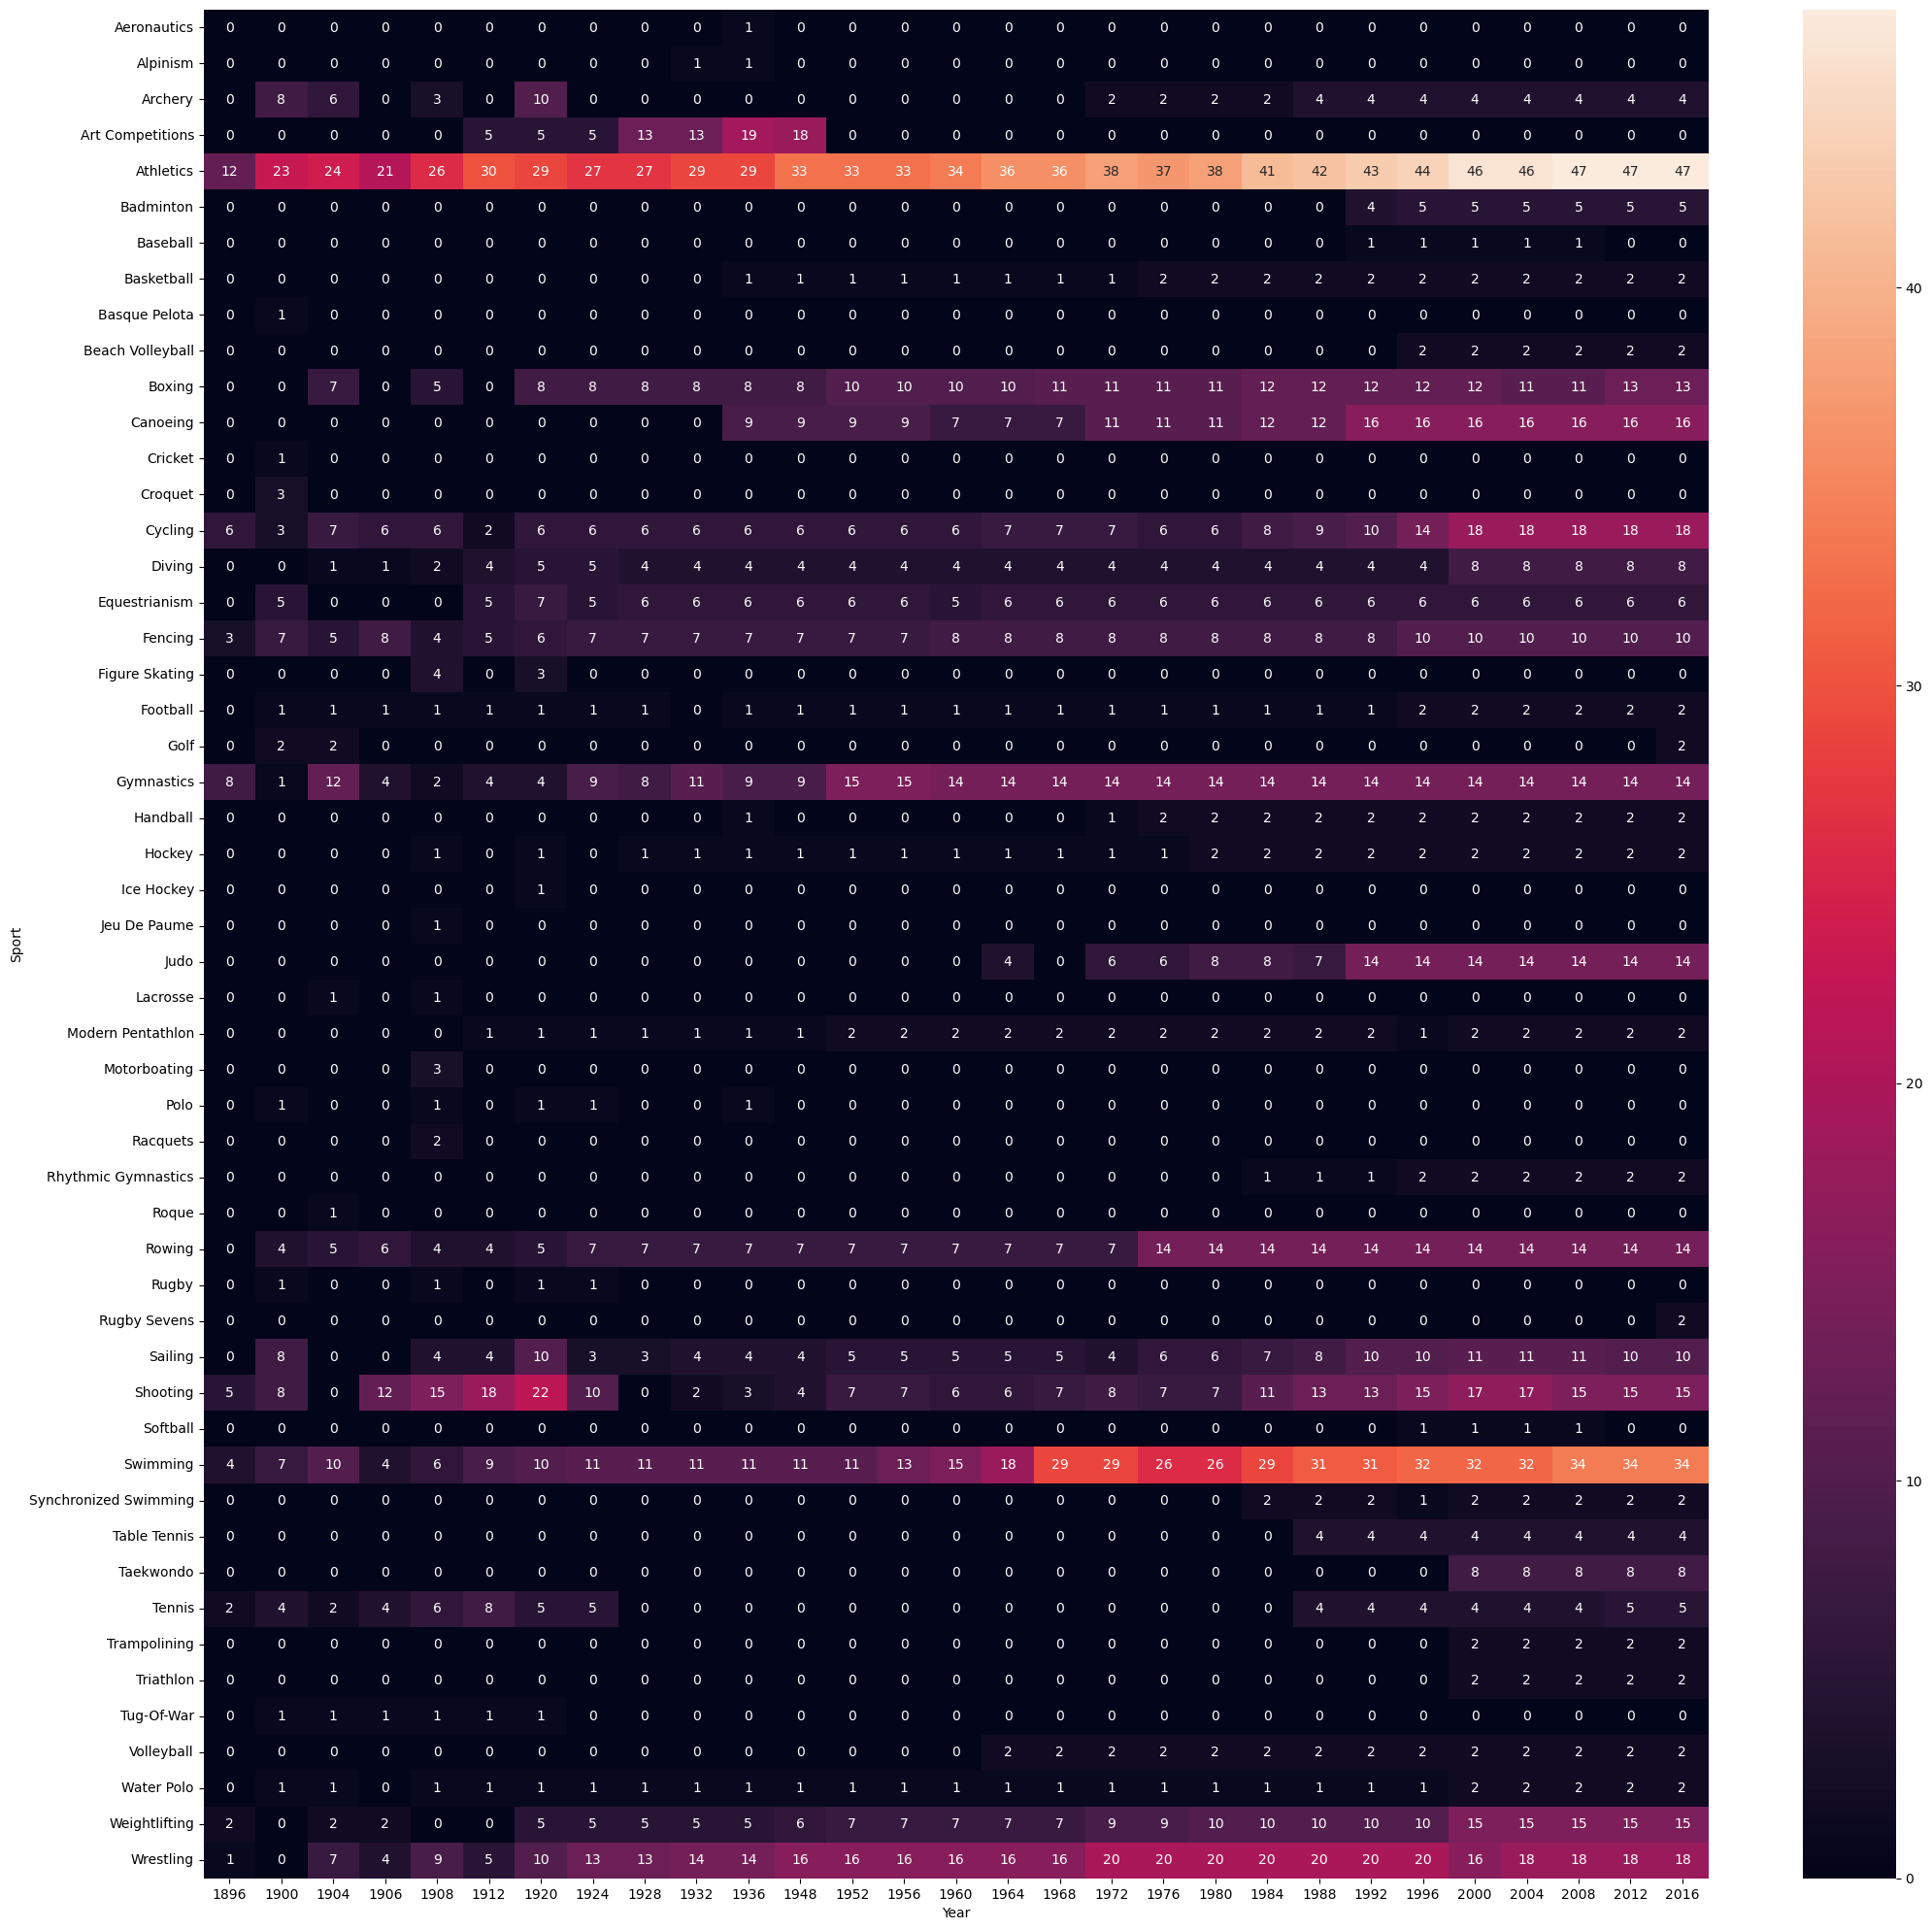

In [42]:
# Removing the duplicate years, events, and sports
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')
x = df.drop_duplicates(['Year','Sport','Event'])

# plotting the graph
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [43]:
def most_successful_countrywise(df, sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge (df,left_on = 'index', right_on = 'Name', how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [44]:
most_successful(df,'Overall')

Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                          Aleksey Yuryevich Nemov      12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
195                           Birgit Fischer-Schmidt      12    Canoeing   
208                               Ryan Steven Lochte      12    Swimming   
222                             Paavo Johannes Nurmi      12   Athletics   
234                                       Sawao Kato      12  Gymnastics   
258                    Natalie Anne Coughlin (-Hall)      12    Swimming   
270                   Matthew Nicholas "Matt" Biondi      11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany  
208      USA  
222  Finland  
234    Japan  
258      USA  
270      USA

## Countrywise

### Countrywise medal tally per year (line plot)

In [45]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace = True)

In [46]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [47]:
fig = px.line(final_df, x="Year", y="Medal") # Create the line plot
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

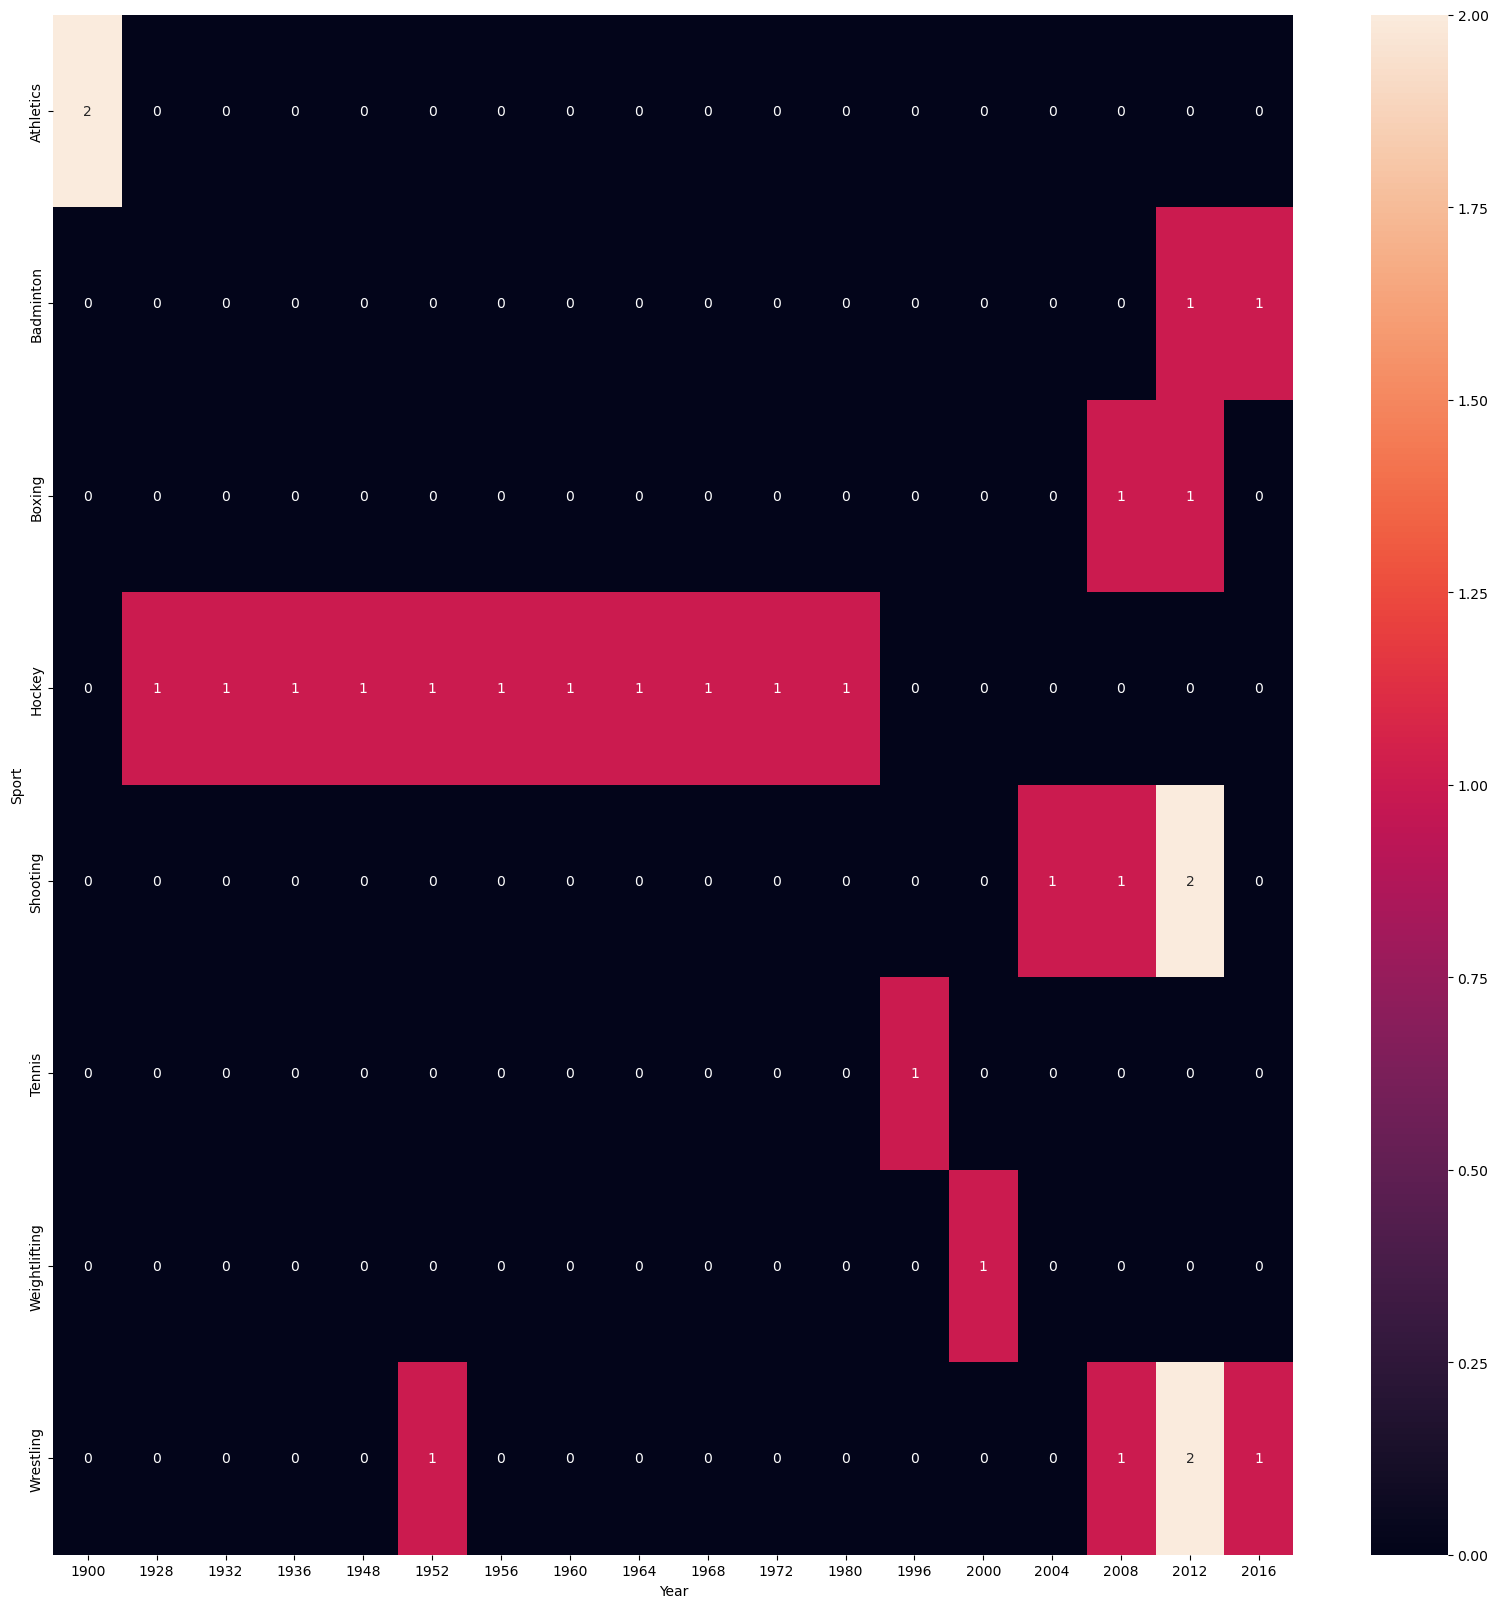

In [48]:
new_df = temp_df[temp_df['region'] == 'India']

# plotting the graph
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0),annot=True)

In [49]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge (df,left_on = 'index', right_on = 'Name', how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [50]:
most_successful(df,'USA')

Name  Medals      Sport
0                            Michael Fred Phelps, II      28   Swimming
30                                Ryan Steven Lochte      12   Swimming
44   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12   Swimming
61                     Natalie Anne Coughlin (-Hall)      12   Swimming
73              Dara Grace Torres (-Hoffman, -Minas)      12   Swimming
86                    Matthew Nicholas "Matt" Biondi      11   Swimming
98                              Carl Townsend Osburn      11   Shooting
114                                Mark Andrew Spitz      11   Swimming
126                      Raymond Clarence "Ray" Ewry      10  Athletics
136                   Frederick Carlton "Carl" Lewis      10  Athletics
146                             Gary Wayne Hall, Jr.      10   Swimming
156                           Allyson Michelle Felix       9  Athletics
166                           Martin Joseph Sheridan       9  Athletics
181                        Shirley Frances Babashoff       9   Swimming
192                           Nathan Ghar-Jun Adrian       8   Swimming

### 5.5 Distribution of Age for Winning Medals

In [51]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

# plotting the graph
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=700, title_text = "Distribution of Age for Winning various Medals")
fig.show()

In [52]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey']

In [53]:
famous_sports

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey']

In [54]:
# Created a sub-dataframe for famous sports
famous_sports_df = athlete_df[athlete_df['Sport'].isin(famous_sports)]

In [55]:
# Count the number of athletes for each sport
sport_counts = famous_sports_df['Sport'].value_counts()

In [56]:
# Sort the sports by the number of athletes
sport_counts = sport_counts.sort_values(ascending=False)

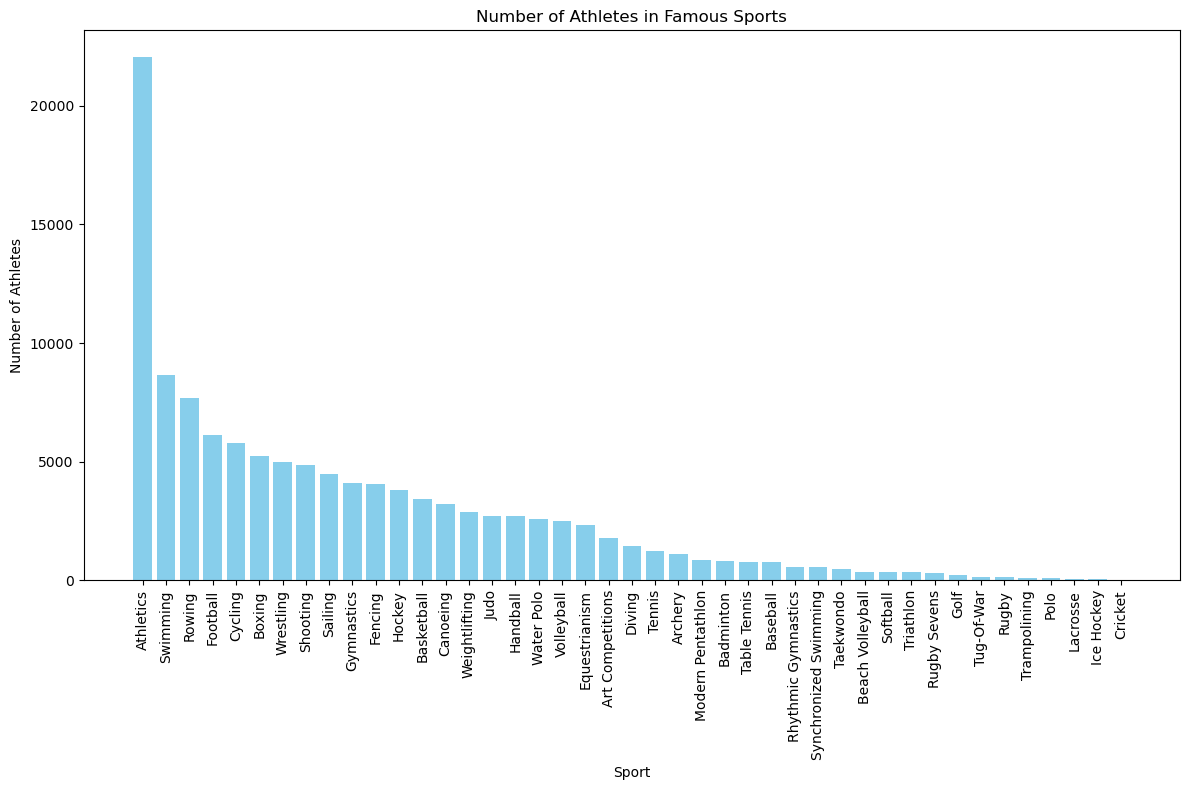

In [57]:
# Create a bar chart
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.bar(sport_counts.index, sport_counts.values, color='skyblue')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes in Famous Sports')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### 5.6 Height - Weight relation for Winning Medals

Text(0.5, 1.0, 'Height vs Weight for Winning Medals')

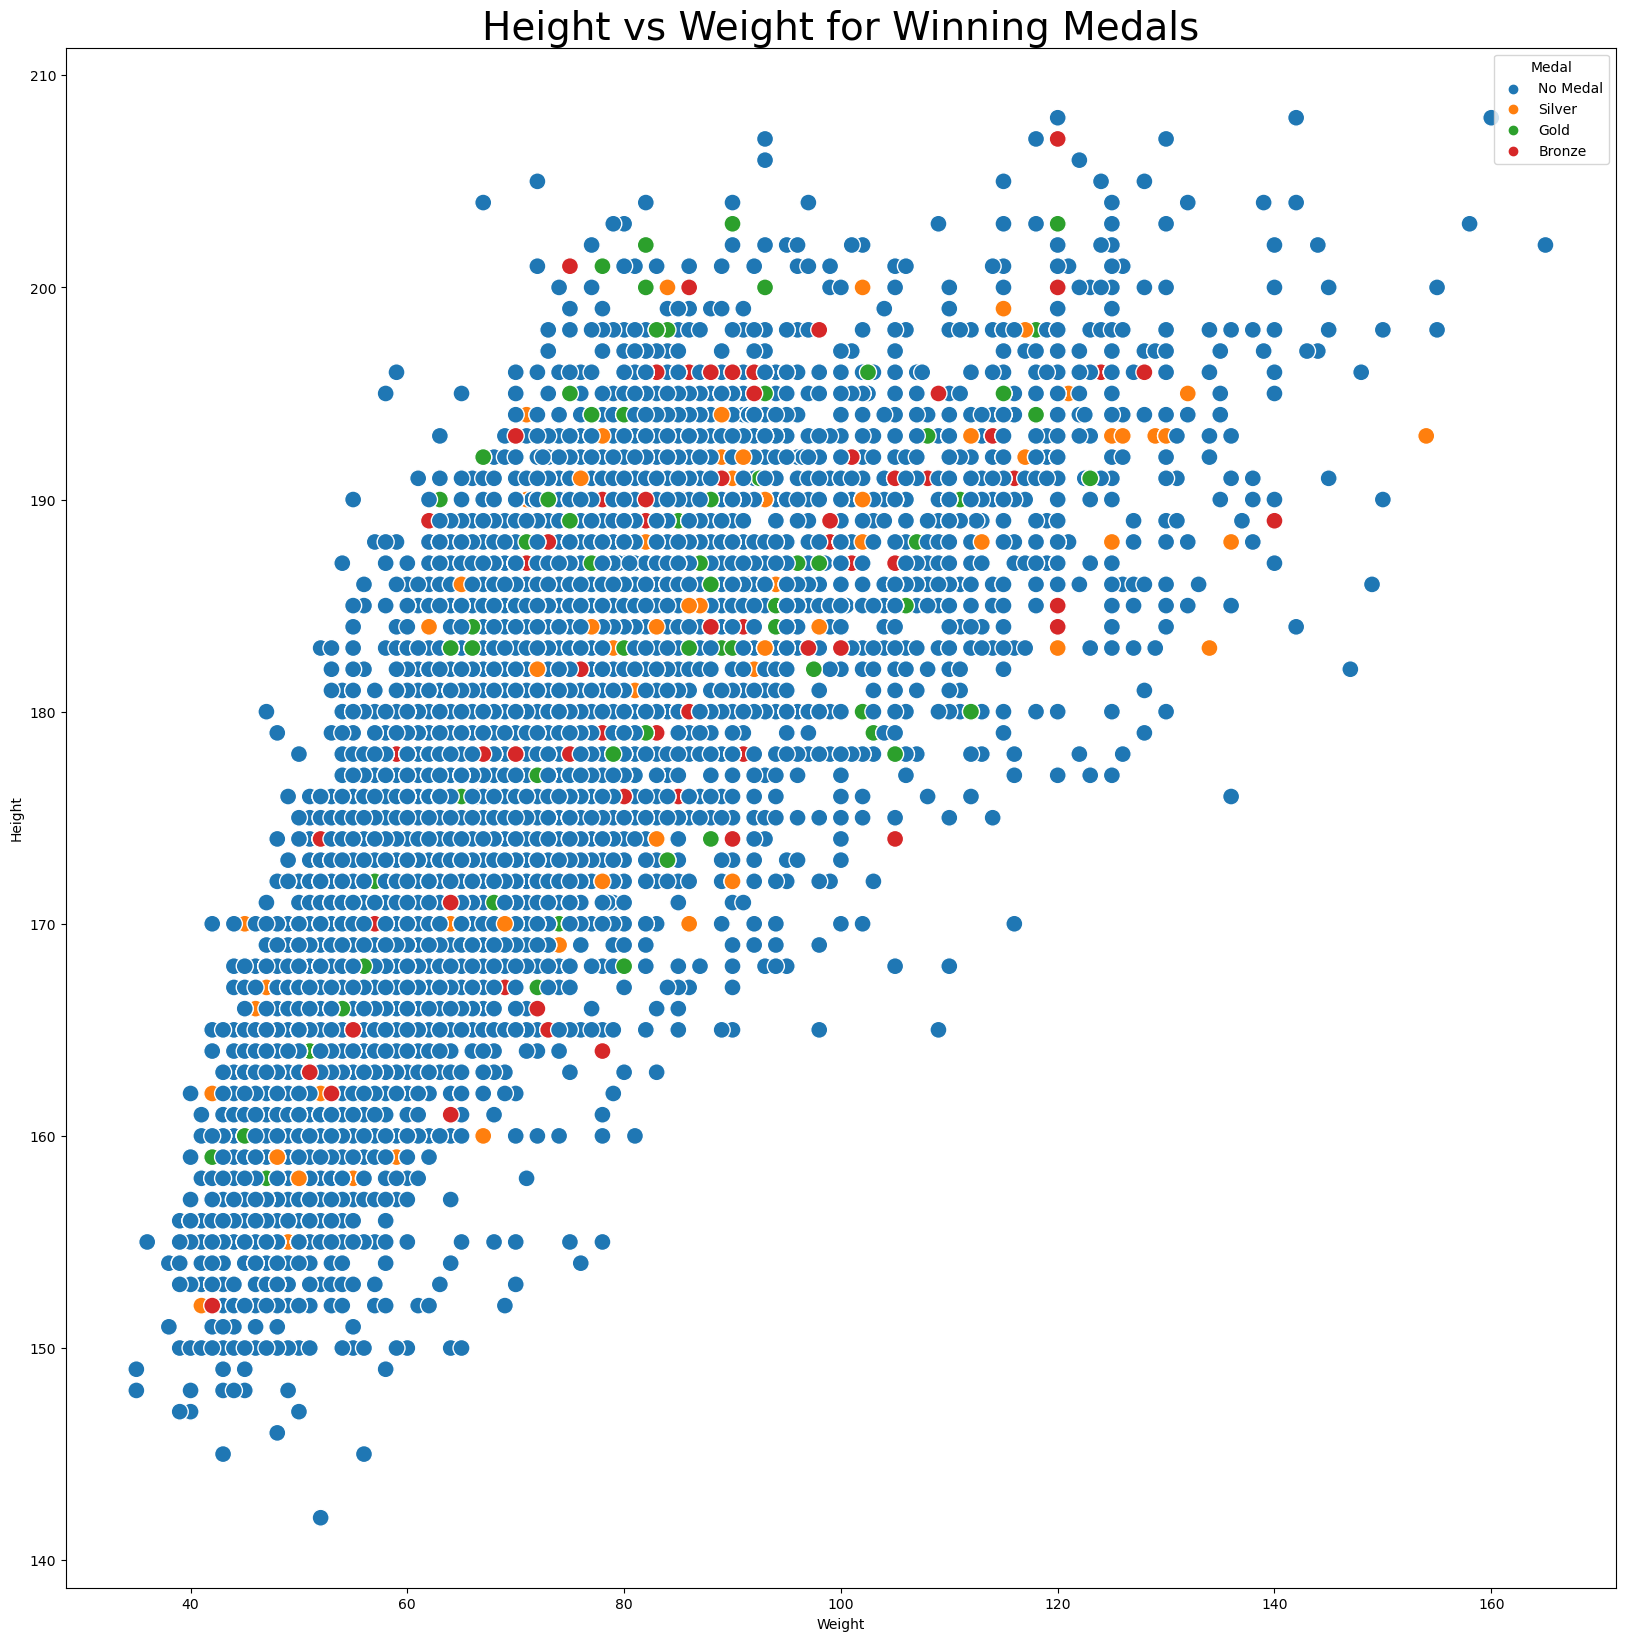

In [58]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

# plotting the scatterplot
plt.figure(figsize=(20,20))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue =temp_df['Medal'],s=150)
plt.title("Height vs Weight for Winning Medals", fontsize=28)

### 5.7 Gender ratio for winning medals over the Years w.r.t Sports

Text(0.5, 1.0, 'Gender ratio relation w.r.t Height - Weight for Winning Medals')

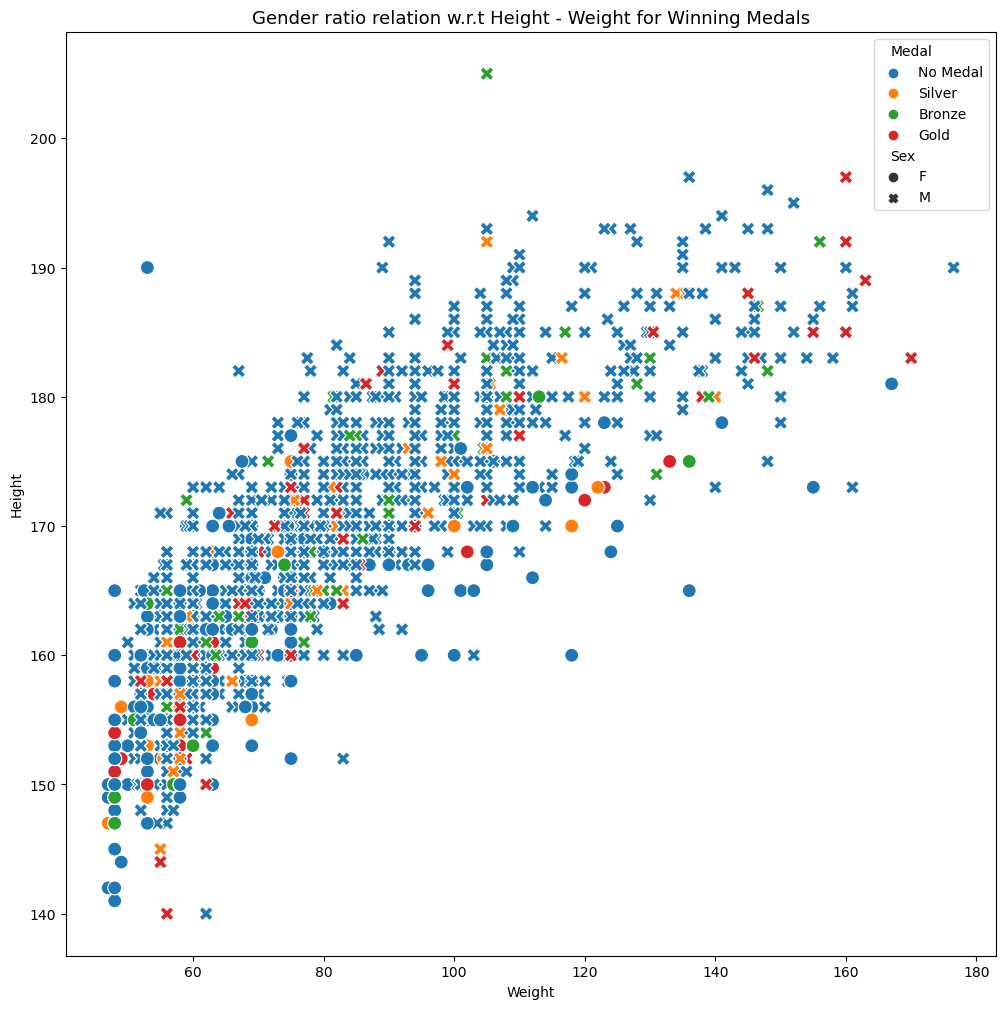

In [59]:
plt.figure(figsize=(12,12))
temp_df = athlete_df[athlete_df['Sport'] == 'Weightlifting']
sns.scatterplot(x=temp_df['Weight'], y=temp_df['Height'],hue =temp_df['Medal'],style=temp_df['Sex'],s=100)
plt.title("Gender ratio relation w.r.t Height - Weight for Winning Medals", fontsize=13)

### 5.8 Men Vs Women Participation Over the Years

In [60]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
final = men.merge(women,on='Year',how ='left')
final.rename(columns={'Name_x':'Male','Name_y':'Female'}, inplace=True)
final.fillna(0,inplace=True)

# plotting the graph
fig = px.line(final, x='Year', y=['Male','Female'], title = "Men vs Women Participation vs Years", height = 700, width =1000)
fig.show()